# <font color='#eb3483'>Ensemble Methods</font>

Ensemble methods combine several several machine learning models (a.k.a. base learners) in order to produce one optimal predictive model. In this lession we study different types of ensemble methods. Before we begin, let's load the necessary libraries and dataset.

In [20]:
# Importing the libraries
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

### <font color='#eb3483'>Load data</font>

The California housing dataset contains information on various socio-economic features of block groups in California. Each row in the dataset represents a single block group, and there are 20,640 observations, each with 10 attributes.

Features are as follows:
1. Longitude: The longitude of the center of each block group in California.
2.Latitude: The latitude of the center of each block group in California.
3.Housing Median Age: The median age of the housing units in each block group.
4.Total Rooms: The total number of rooms in the housing units in each block group.
5.Total Bedrooms: The total number of bedrooms in the housing units in each block group.
6.Population: The total population of the block group.
7.Households: The total number of households in the block group.
8.Median Income: The median income of the block group.
9.Median House Value: The median value of the housing units in the block group.
10.Ocean Proximity: The proximity of the block group to the ocean or other bodies of water.

In [21]:
path = "/Users/mollyrudisill/ix24_mollyr/ix_datascience-main/classwork/housing.csv"
data = pd.read_csv(path)
# Dataset is now stored in a Pandas Dataframe

In [22]:
# See head of the dataset
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## <font color='#eb3483'>EDA</font>

In [23]:
#Check the shape of dataframe
data.shape

(20640, 10)

In [24]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [25]:
data.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [26]:
# Identifying the unique number of values in the dataset
data.nunique()

longitude               844
latitude                862
housing_median_age       52
total_rooms            5926
total_bedrooms         1923
population             3888
households             1815
median_income         12928
median_house_value     3842
ocean_proximity           5
dtype: int64

In [27]:
# Check for missing values
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [28]:
# See rows with missing values
data[data.isnull().any(axis=1)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


In [29]:
data["ocean_proximity"].value_counts(ascending=True)

ocean_proximity
ISLAND           5
NEAR BAY      2290
NEAR OCEAN    2658
INLAND        6551
<1H OCEAN     9136
Name: count, dtype: int64

TypeError: 'str' object is not callable

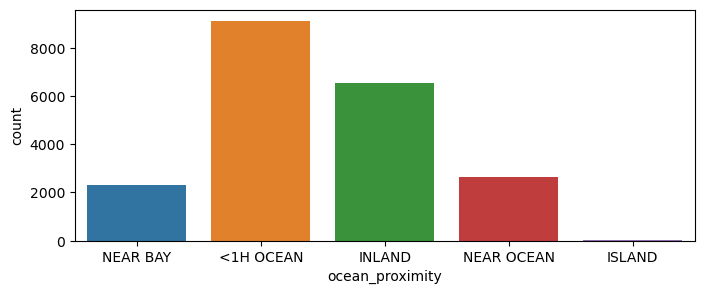

In [30]:
# Distribution of Categorical Variable ('ocean_proximity')
plt.figure(figsize=(8, 3))
sns.countplot(x=data['ocean_proximity'])
plt.title('Distribution of Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Frequency')
plt.show()

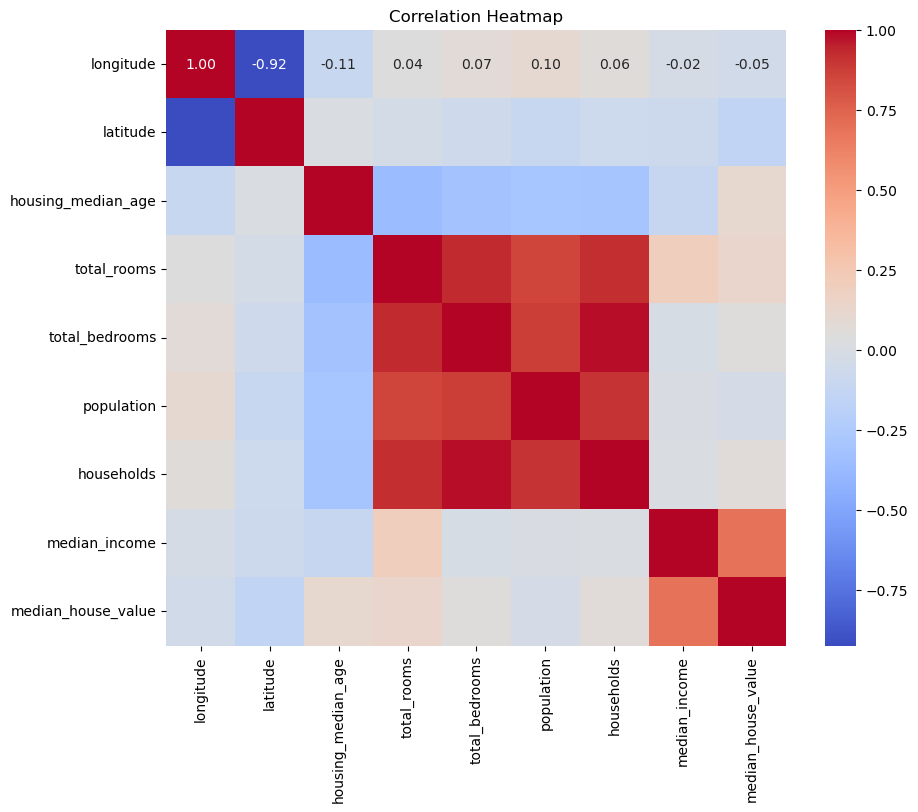

In [ ]:
# Finding out the correlation between the features
# Exclude non-numeric columns for correlation heatmap
numeric_data = data.drop(columns=['ocean_proximity'])

# Correlation heatmap
plt.figure(figsize=(10, 8))
corr = numeric_data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Text(0.5, 1.0, 'Correlation of numerical attributes with House Value')

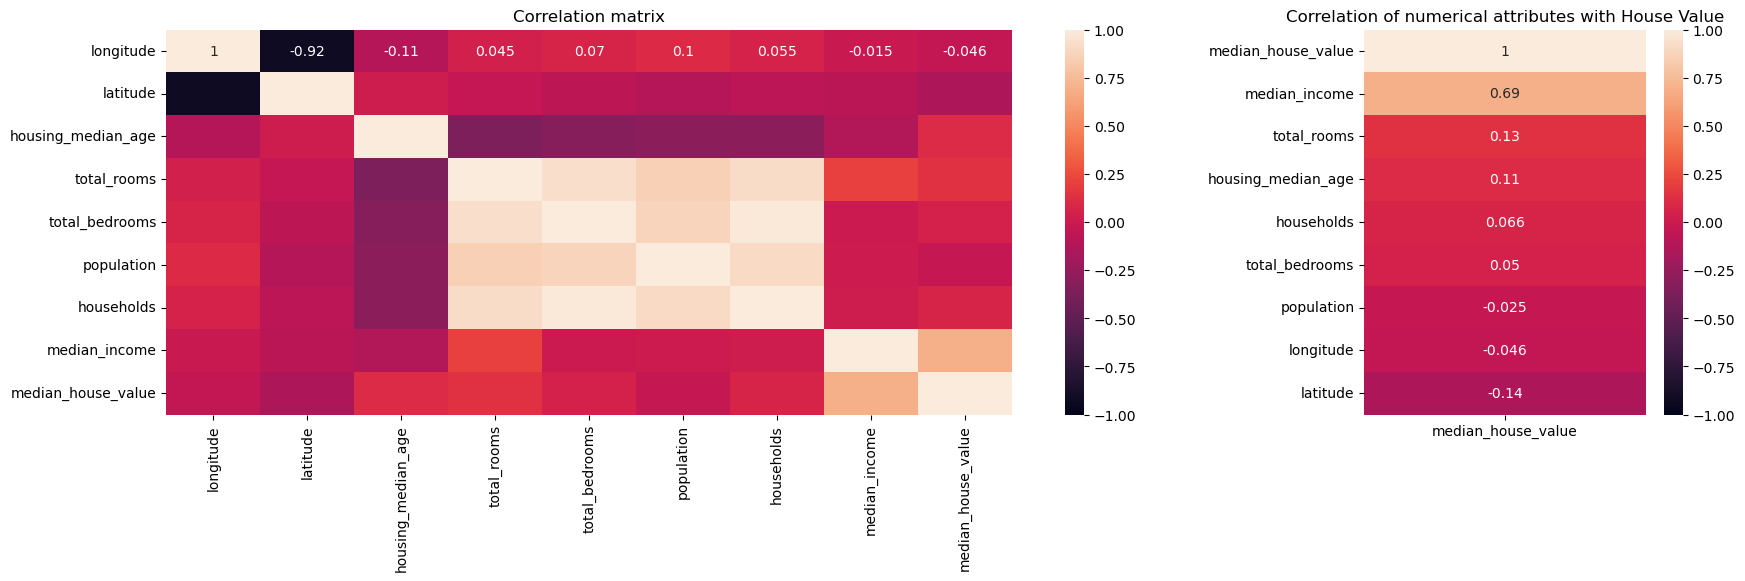

In [ ]:
# Finding out the correlation between the features
f, axs = plt.subplots(1, 2, figsize=(20, 5), width_ratios=[3, 1])
sns.heatmap(data=data.corr(method="pearson", numeric_only=True), vmin=-1, vmax=1, annot=True, ax=axs[0])
axs[0].set_title("Correlation matrix")
sns.heatmap(data=data.corr(method="pearson", numeric_only=True)[["median_house_value"]].sort_values('median_house_value', ascending=False), vmin=-1, vmax=1, annot=True, ax=axs[1])
axs[1].set_title("Correlation of numerical attributes with House Value")

In [ ]:
price_correlation= corr

for feature, correlation in price_correlation.items():
        if correlation.any() > 0:
            print(f"There is a positive correlation between house price and {feature}")
        elif correlation < 0:
            print(f"There is a negative correlation between house price and {feature}")
        else:
            print(f"There is no correlation between house price and {feature}")

There is a positive correlation between house price and longitude
There is a positive correlation between house price and latitude
There is a positive correlation between house price and housing_median_age
There is a positive correlation between house price and total_rooms
There is a positive correlation between house price and total_bedrooms
There is a positive correlation between house price and population
There is a positive correlation between house price and households
There is a positive correlation between house price and median_income
There is a positive correlation between house price and median_house_value


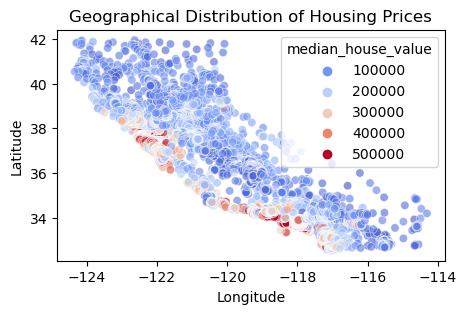

In [ ]:
# Scatter plot of latitude and longitude to visualize geographical data
plt.figure(figsize=(5, 3))
sns.scatterplot(x='longitude', y='latitude', data=data, hue='median_house_value', palette='coolwarm', alpha=0.6)
plt.title('Geographical Distribution of Housing Prices')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


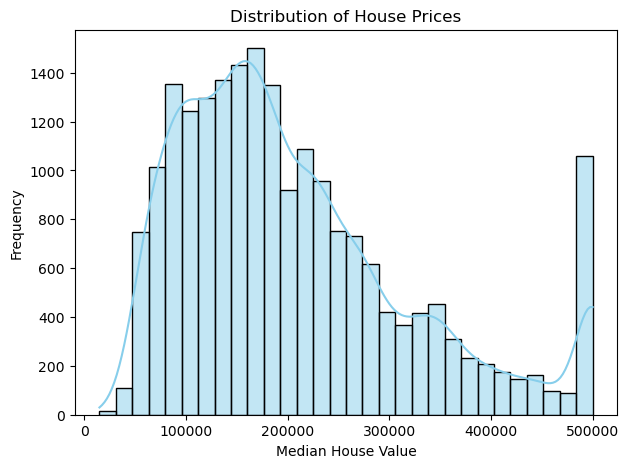

In [ ]:
#Distribution of Target Variable ('median_house_value')

plt.figure(figsize=(7, 5))
sns.histplot(data['median_house_value'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of House Prices')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

Text(0, 0.5, 'median_house_value')

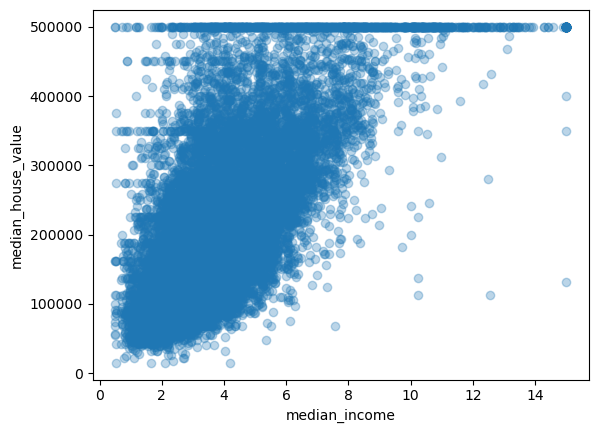

In [ ]:
plt.scatter(data["median_income"],data["median_house_value"],alpha=0.3)
plt.title=("median_income vs median_house_value")
plt.xlabel("median_income")
plt.ylabel("median_house_value")

TypeError: 'str' object is not callable

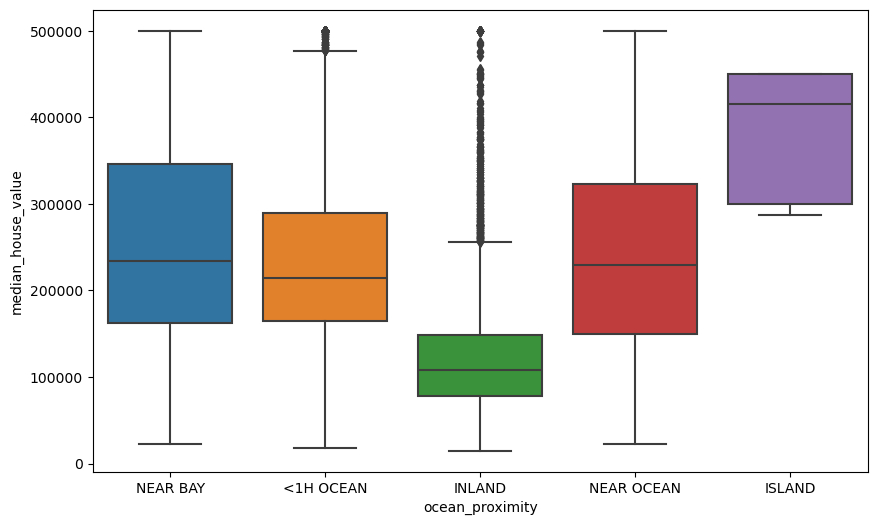

In [ ]:
# Boxplot of median house value
plt.figure(figsize=(10, 6))
sns.boxplot(x='ocean_proximity', y='median_house_value',data=data)
plt.title('Median House Value by Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value')
plt.show()

median_house_value
500001.0    965
137500.0    122
162500.0    117
112500.0    103
187500.0     93
Name: count, dtype: int64


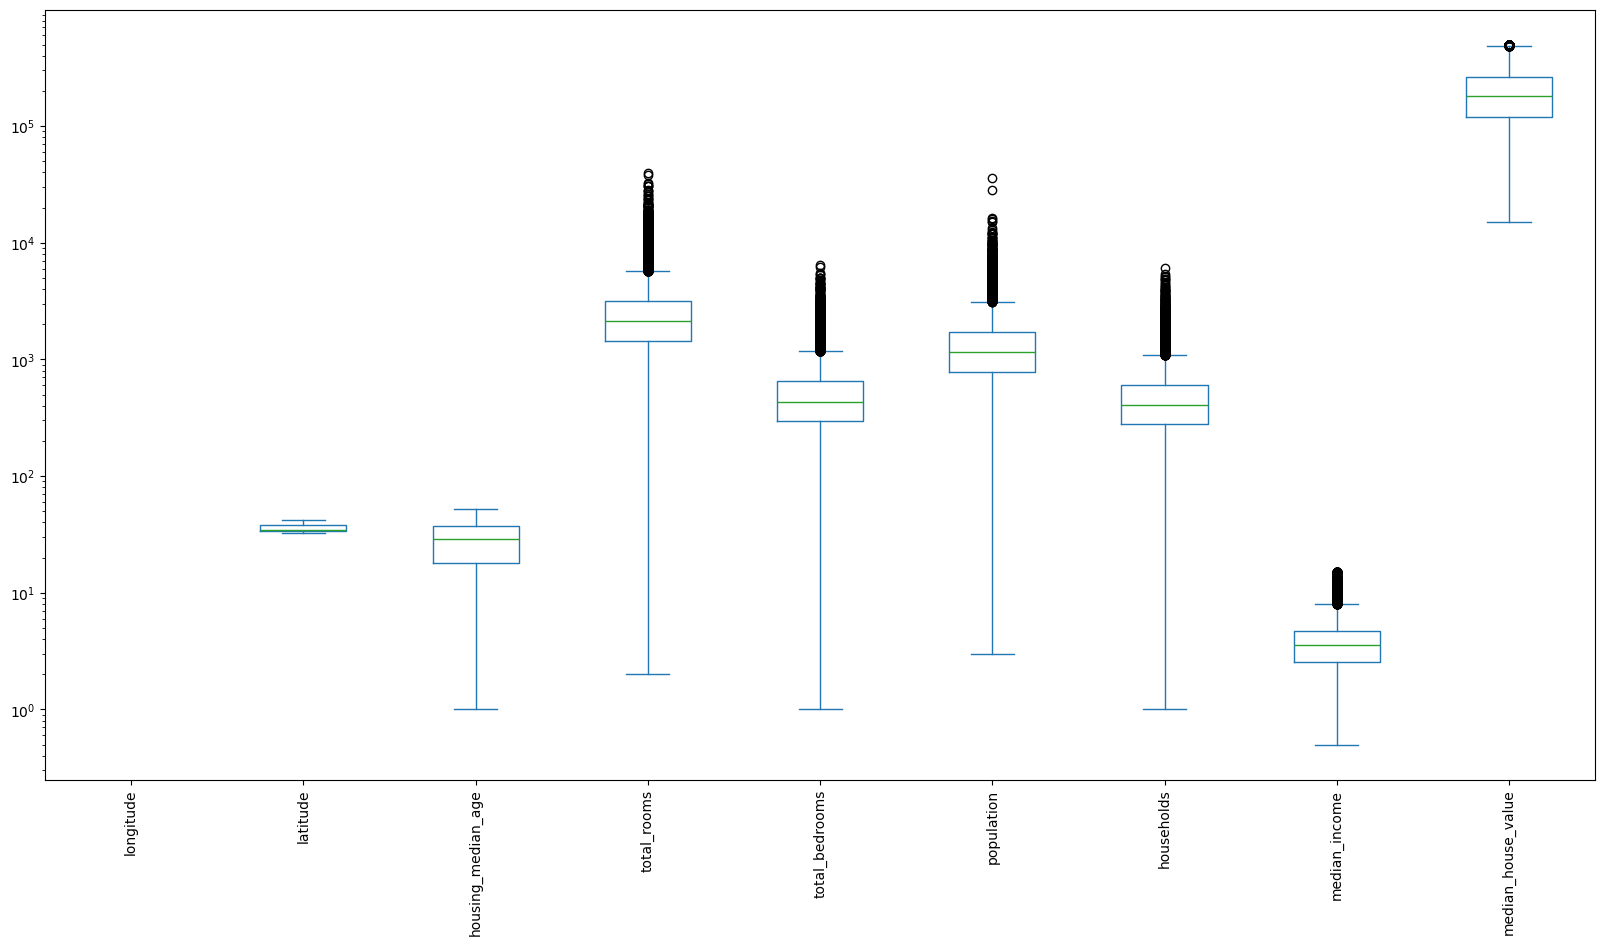

In [31]:
#Outlier detection
#Lets check if there are any outliers in our dataset
print(data.median_house_value.value_counts().head())
california = data[data.median_house_value != 50.0]
california.plot(kind='box', rot=90, logy=True,figsize=(20,10));

We see that different features are on different scales our linear models(regularized ones) would need to have the data scaled. There are a lot of outliers in the dataset in majority of the features. We will first see how each predictor models the response.

## <font color='#eb3483'>Feature Engineering</font>

In [32]:
# Create a new feature 'rooms_per_household', which represents the average number of rooms per household
data['rooms_per_household'] = data['total_rooms'] / data['households']
data.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137


In [33]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['ocean_proximity_encoded'] = label_encoder.fit_transform(data['ocean_proximity'])

In [54]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,ocean_proximity_encoded
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,3
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,3
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,3
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,3
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,3


In [34]:
# Splitting to training and testing data
X=data[['longitude','latitude','housing_median_age','rooms_per_household','population','households','median_income','ocean_proximity_encoded']]
y = data['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4)

We will train some models to get a good baseline of what performance should be

## 1. Linear regression

### Training the model

In [35]:
# Import library for Linear Regression
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
lm = LinearRegression()

# Train the model using the training sets
lm.fit(X_train, y_train)

LinearRegression()

In [36]:
# Value of y intercept
lm.intercept_

-3754829.723998364

In [37]:
#Converting the coefficient values to a dataframe
coeffcients = pd.DataFrame([X_train.columns,lm.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,longitude,-44968.323662
1,latitude,-45250.004001
2,housing_median_age,1176.321645
3,rooms_per_household,2173.237803
4,population,-45.73546
5,households,151.02973
6,median_income,36718.95458
7,ocean_proximity_encoded,-585.338899


**Remeber:**

* The magnitude of the coefficient indicates the strength of the relationship. A larger magnitude suggests a stronger impact on the target variable.

* The sign of the coefficient (+ or -) indicates the direction of the relationship. A positive coefficient means that as the feature increases, the target variable is expected to increase as well. A negative coefficient means that as the feature increases, the target variable is expected to decrease.

TypeError: 'str' object is not callable

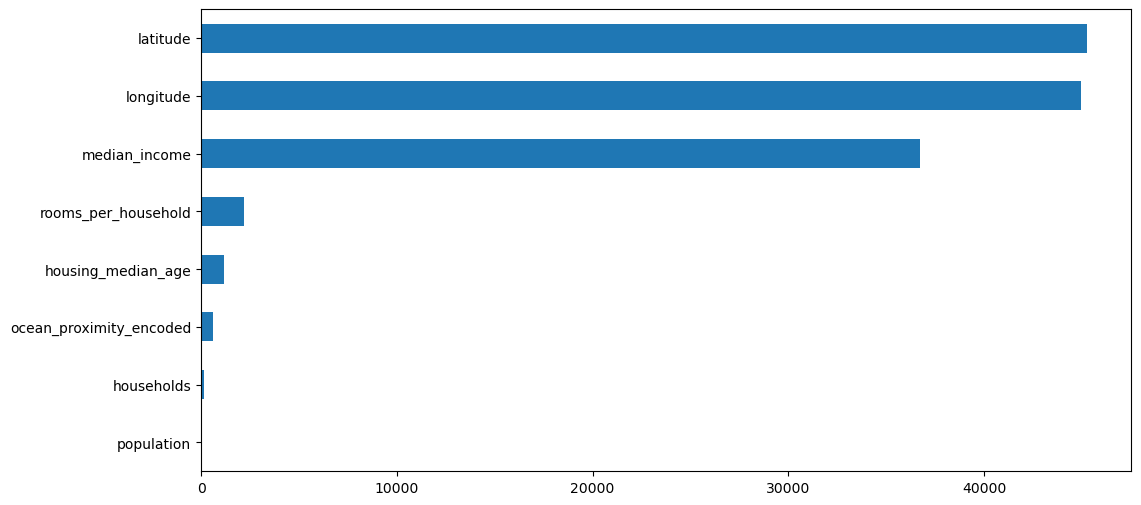

In [38]:
# Get feature importance from the coefficients
feature_importance = pd.Series(lm.coef_, index=X.columns)
feature_importance = feature_importance.abs().sort_values(ascending=False)

# Plotting the feature importances
plt.figure(figsize=(12, 6))
feature_importance.plot(kind='barh')
plt.gca().invert_yaxis()  # Invert the y-axis to flip the bars
plt.title('Feature Importance in Linear Regression')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Feature')
plt.show()

### Model Evaluation

In [39]:
# Model prediction on train data
y_pred = lm.predict(X_train)

In [40]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.6380989461004714
Adjusted R^2: 0.6378984330156874
MAE: 51220.2873709712
MSE: 4857050369.315429
RMSE: 69692.54170508799


𝑅^2 : It is a measure of the linear relationship between X and Y. It is interpreted as the proportion of the variance in the dependent variable that is predictable from the independent variable.

Adjusted 𝑅^2 :The adjusted R-squared compares the explanatory power of regression models that contain different numbers of predictors.

MAE : It is the mean of the absolute value of the errors. It measures the difference between two continuous variables, here actual and predicted values of y.

MSE: The mean square error (MSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value.

RMSE: The mean square error (MSE) is just like the MAE, but squares the difference before summing them all instead of using the absolute value.

TypeError: 'str' object is not callable

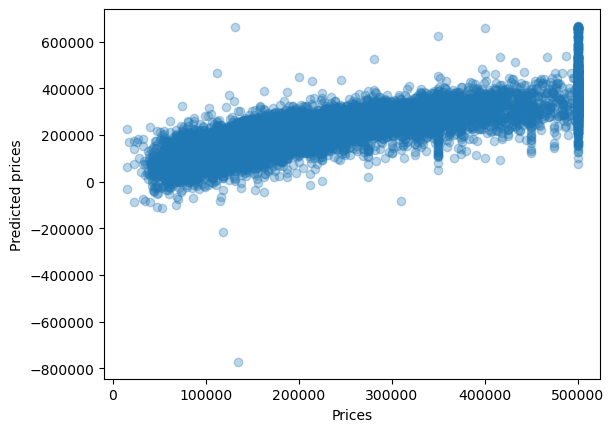

In [41]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred,alpha=0.3)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

### For test data

In [42]:
# Predicting Test data with the model
y_test_pred = lm.predict(X_test)

In [43]:
# Model Evaluation
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.6236065515786461
Adjusted R^2: 0.62311954727857
MAE: 51362.84917401951
MSE: 4918443110.835421
RMSE: 70131.61277794359


Here the model evaluations scores are almost matching with that of train data. So the model is not overfitting.

## 2. Random Forest Regressor

### Train the model: X_train

In [44]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
reg = RandomForestRegressor()

# Train the model using the training sets
reg.fit(X_train, y_train)

RandomForestRegressor()

In [45]:
RandomForestRegressor?

Init signature:
RandomForestRegressor(
    n_estimators=100,
    *,
    criterion='squared_error',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=1.0,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    ccp_alpha=0.0,
    max_samples=None,
)
Docstring:     
A random forest regressor.

A random forest is a meta estimator that fits a number of classifying
decision trees on various sub-samples of the dataset and uses averaging
to improve the predictive accuracy and control over-fitting.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is used to build
each tree.

Read more in the :ref:`User Guide <forest>`.

Parameters
----------
n_estimators : int, default=100
    The number of trees in the forest.

    .. versioncha

sklearn's RandomForest implementation trains each base tree with a dataset the same size as the training dataset (sampling with replacement if `bootstrap=True`).

In [46]:
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

RandomForestRegressor(criterion='mse', max_features='auto', n_estimators=10)

In [47]:
# if we make n_estimators higher than 100 it would take looonger to run. #stop kernel
# try a few options and see the performance of the model e.g. randomforest_10 versus randomforest_100

### Model Evaluation

In [48]:
# Model prediction on train data
y_pred = reg.predict(X_train)

In [49]:
# Model Evaluation
acc_rf_train = metrics.r2_score(y_train, y_pred)
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.9743818909462358
Adjusted R^2: 0.9743676971050813
MAE: 11908.536202934662
MSE: 343818965.70904154
RMSE: 18542.355991325414


The Root Mean Squared Error (RMSE) of approximately 18688 indicates that, on average, the model's predictions deviate by around $18688 from the actual house prices in the test set. This value gives us an understanding of the performance of the model in predicting house prices, with lower RMSE values indicating better performance.

TypeError: 'str' object is not callable

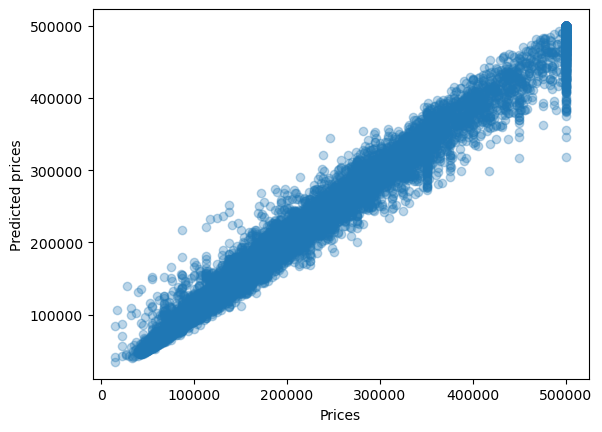

In [50]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred,alpha=0.3)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

### For test data: : X_test

In [51]:
# Predicting Test data with the model
y_test_pred = reg.predict(X_test)

In [52]:
# Model Evaluation
acc_rf = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_rf)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.814947475513659
Adjusted R^2: 0.8147080415502285
MAE: 32066.52291020672
MSE: 2418135379.4013343
RMSE: 49174.53995108988


Another example of "extremely randomised Trees" There is a different kind of decision tree type named Extremely Randomized Trees that decide the tree splits into branches completely randomly (ie not based on information gain).

These trees are weak estimators by themselves (not surprisingly).

However, they are better than a 100% random estimator, and each random tree is different. This makes then a perfect estimator a perfect base estimator, because by aggregating a group of them the general error diminishes. Since each tree is trained on a different set of observations, their errors will differ.

## 3. XGBoost

XGBoost (eXtreme Gradient Boosting) implements gradient boosted trees but focused on large datasets.

Because it is a relatively new dataset (the research started in 2014, and the original paper was published in 2016 [link to the](https://arxiv.org/abs/1603.02754)) it is not implemented in scikit-learn. However it is avaiable in the package [xgboost](http://xgboost.readthedocs.io/en/latest/python/python_intro.html), that implements XGBoost that follow's scikit-learn api.

In [58]:
# Import XGBoost Regressor
from xgboost import XGBRegressor

#Create a XGBoost Regressor
reg = XGBRegressor()

# Train the model using the training sets
reg.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [59]:
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=0, max_depth=3,
             max_leaves=None, min_child_weight=1, missing=None,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=1, nthread=None, num_parallel_tree=None, ...)

In [68]:
# here we change a number of parameters e.g. made n_estimators=100
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=None, colsample_bytree=None,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=1, missing=None,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=1, nthread=None, num_parallel_tree=None, ...)

### Model Evaluation

In [69]:
# Model prediction on train data
y_pred = reg.predict(X_train)

In [70]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.9412462199201156
Adjusted R^2: 0.9412136670950835
MAE: 19788.074856408544
MSE: 788530638.8604906
RMSE: 28080.78771794856


TypeError: 'str' object is not callable

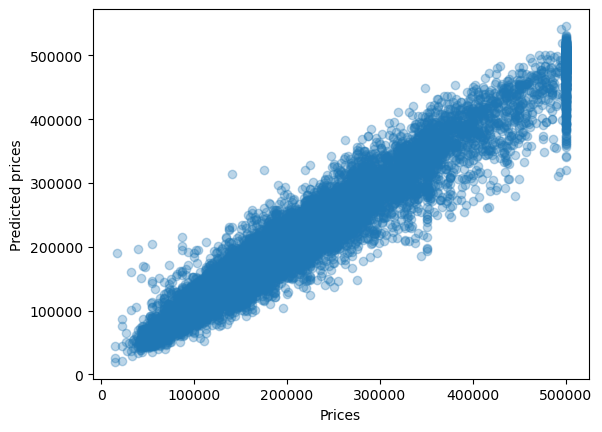

In [63]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred,alpha=0.3)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

### Test Data

In [64]:
#Predicting Test data with the model
y_test_pred = reg.predict(X_test)

In [65]:
# Model Evaluation
acc_xgb = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_xgb)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.8347571421888174
Adjusted R^2: 0.8345433393645428
MAE: 30827.196379590096
MSE: 2159276679.8277225
RMSE: 46468.017816856816


# Evaluation and comparision of all the models

In [71]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'R-squared Score': [acc_linreg*100, acc_rf*100, acc_xgb*100]})
models.sort_values(by='R-squared Score', ascending=False)

,Model,R-squared Score
2,XGBoost,83.475714
1,Random Forest,81.494748
0,Linear Regression,62.360655


In [73]:
#add test and train outputs to the table as well
acc_rf_train*100

97.43818909462358

Which one works the best for this dataset?

BONUS: try out and compare SVM Regressor or any other algorithm of interest
Here is a useful article if you want to read up a bit more on boosting https://www.analyticsvidhya.com/blog/2020/02/4-boosting-algorithms-machine-learning/